In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as linalg
%matplotlib inline

### Define input data and output data

In [2]:
# freq = 2
# train_X = np.array([[0.7722,0.4380,0.1117,0.0305],[-0.8456,0.6876,0.4075,0.1525],[0.1117,0.0305,0.8839,0.4686],[0.4075,0.1525,-0.4380,0.8401]], dtype=np.float32)
# freq = 100
# train_X = np.array([[0.9999,0.0100,0.0000,0.0000],[-0.0200,0.9979,0.0100,0.0010],[ 0.0000,0.0000,1.0000,0.0100],[0.0100,0.0010,-0.0100,0.9990]], dtype=np.float32)
# freq = 10
train_X = np.array([[0.9901,0.0987,0.0049,0.0007],[-0.1967,0.9704,0.0980,0.0147],[0.0049,0.0007,0.9950,0.0993],[0.0980,0.0147,-0.0987,0.9852]], dtype=np.float32)
train_y = np.zeros([1, 16], dtype=np.float32)
train_X = train_X.reshape(1,16)
train_mask_X = np.array([[1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,]])
print(train_X)
print(train_X.shape)
print(train_y.shape)
print(train_mask_X.shape)

[[ 9.901e-01  9.870e-02  4.900e-03  7.000e-04 -1.967e-01  9.704e-01
   9.800e-02  1.470e-02  4.900e-03  7.000e-04  9.950e-01  9.930e-02
   9.800e-02  1.470e-02 -9.870e-02  9.852e-01]]
(1, 16)
(1, 16)
(1, 16)


### Define neural network

In [3]:
X = tf.placeholder("float", [None, 16])
y = tf.placeholder("float", [None, 16])
mask_X = tf.placeholder("float", [None, 16])
biases = {
    'out': tf.Variable(tf.random_normal([16]))
}
temp_x = tf.multiply(biases['out'], mask_X)
pred_y = tf.add(X, temp_x)

Instructions for updating:
Colocations handled automatically by placer.


### Define the loss function

In [96]:
[e, v] = tf.linalg.eigh(tf.reshape(pred_y, [4,4]))
loss_op = tf.reduce_mean(tf.abs(e))

### Define optimizer

In [ ]:
lr = 0.1
optimizer = tf.train.AdadeltaOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss_op)

### Training

In [105]:
training_step = 100000
loss_collect = []
para = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(training_step):
        sess.run(train_op, feed_dict={X:train_X, y:train_y, mask_X:train_mask_X})
        er = sess.run(loss_op, feed_dict={X:train_X, y:train_y, mask_X:train_mask_X})
        loss_collect.append(er)
        if step == training_step-1:
            para = sess.run(biases['out'])
para

array([-0.9897511 ,  0.4882071 ,  0.35442173, -0.44488063,  0.19670007,
        0.03897231, -1.2367382 , -0.35897586, -0.00490059,  0.5113947 ,
       -0.9946962 , -0.4629927 , -0.09799996,  0.17114119,  0.09871061,
       -2.727859  ], dtype=float32)

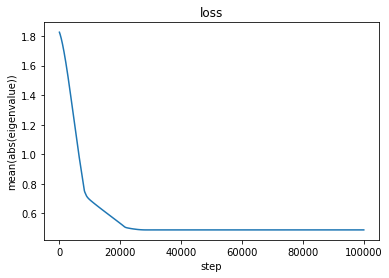

In [116]:
x_dot = np.linspace(0, training_step, training_step)
plt.plot(x_dot, loss_collect)
plt.title('loss')
plt.xlabel('step')
plt.ylabel('mean(abs(eigenvalue))')
plt.show()

In [107]:
para = para.reshape(4,4)
para[:, 1] = 0
para[:, 3] = 0
para

array([[-0.9897511 ,  0.        ,  0.35442173,  0.        ],
       [ 0.19670007,  0.        , -1.2367382 ,  0.        ],
       [-0.00490059,  0.        , -0.9946962 ,  0.        ],
       [-0.09799996,  0.        ,  0.09871061,  0.        ]],
      dtype=float32)

In [108]:
A = train_X.reshape(4,4)
A

array([[ 9.901e-01,  9.870e-02,  4.900e-03,  7.000e-04],
       [-1.967e-01,  9.704e-01,  9.800e-02,  1.470e-02],
       [ 4.900e-03,  7.000e-04,  9.950e-01,  9.930e-02],
       [ 9.800e-02,  1.470e-02, -9.870e-02,  9.852e-01]], dtype=float32)

In [109]:
A_bar = A + para
A_bar

array([[ 3.4892559e-04,  9.8700002e-02,  3.5932174e-01,  6.9999998e-04],
       [ 5.9604645e-08,  9.7039998e-01, -1.1387382e+00,  1.4700000e-02],
       [-5.8626756e-07,  6.9999998e-04,  3.0380487e-04,  9.9299997e-02],
       [ 3.7252903e-08,  1.4700000e-02,  1.0609627e-05,  9.8519999e-01]],
      dtype=float32)

In [110]:
import scipy.linalg as lin
[eigvalue, eigvec] = lin.eig(A_bar)
for i in eigvalue:
    print("eig: ", i)
print(np.mean(np.abs(eigvalue)))

eig:  (-0.0001320868+0.00021961545j)
eig:  (-0.0001320868-0.00021961545j)
eig:  (0.9782586+0.0377104j)
eig:  (0.9782586-0.0377104j)
0.48962075


In [111]:
a = np.zeros([8], dtype=np.float32)
c = 0
for i in para.reshape(-1,1):
    if(i[0]!=0):
        a[c] = i[0]
        c+=1

In [112]:
a

array([-0.9897511 ,  0.35442173,  0.19670007, -1.2367382 , -0.00490059,
       -0.9946962 , -0.09799996,  0.09871061], dtype=float32)